In [1]:
import sys
from os.path import dirname, join as path_join
sys.path.insert(0, path_join(".." ,"..", ".."))

import numpy as np

from causality.estimation.causal_forest import CausalForest


In [2]:
dimensionality = 2
num_samples = 500

def treatment_effect(unit):
    x_1 = unit[0]
    x_2 = unit[1]
    
    def xi(x):
        return 2. / (1. + np.exp(-12 * (x - 1 / 2.)))
    return xi(x_1) * xi(x_2)

covariates = np.asarray([
    np.random.uniform(size=dimensionality)
    for _ in range(num_samples)
])

treatment_assignment = np.random.choice([0, 1], size=num_samples)

observed_outcomes = np.asarray([
    0 if not treatment else treatment_effect(unit)
    for unit, treatment in zip(covariates, treatment_assignment) 
])


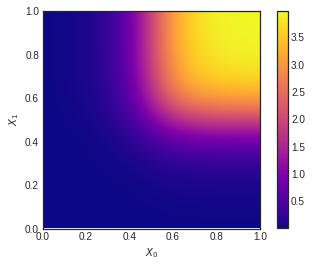

In [4]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

X_0 = np.linspace(0, 1, 1000)
X_1 = np.linspace(0, 1, 1000)

X_, Y_ = np.meshgrid(X_0, X_1)


Z = np.asarray([
    [treatment_effect((x_0, x_1)) for x_0 in X_0] 
    for x_1 in X_1
])

plt.imshow(
    Z, origin="lower",
    extent=[X_0.min(), X_0.max(),
            X_1.min(), X_1.max(),],
    cmap="plasma"
)
plt.colorbar()
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")
plt.show()

(100, 100)


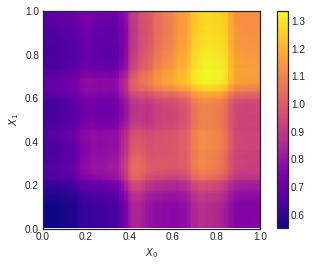

In [5]:
cf = CausalForest()


def evaluation_unit(x_0, x_1):
    return np.asarray([x_0, x_1] + np.random.uniform(size=dimensionality - 2).tolist())

X_0 = np.linspace(0, 1, 100)
X_1 = np.linspace(0, 1, 100)

cf = CausalForest().fit(
    covariates=covariates, 
    treatment_assignment=treatment_assignment, 
    observed_outcomes=observed_outcomes
)

Z = np.asarray([
    [cf.predict(covariates=np.expand_dims(evaluation_unit(x_0, x_1), axis=0)) for x_0 in X_0] 
    for x_1 in X_1
])
print(Z.shape)


plt.imshow(
    Z, origin="lower",
    extent=[X_0.min(), X_0.max(),
            X_1.min(), X_1.max(),],
    cmap="plasma"
)
plt.colorbar()
plt.xlabel(r"$X_0$")
plt.ylabel(r"$X_1$")
plt.show()

